In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
data.shape

(891, 12)

In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
X_raw=data.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
X_raw.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [8]:
Y=data['Survived']
X_raw.corrwith(Y)

Pclass   -0.338481
Age      -0.077221
SibSp    -0.035322
Parch     0.081629
Fare      0.257307
dtype: float64

In [9]:
X_raw.corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


In [19]:
X_raw['Embarked'].isnull().values.any()

True

In [21]:
X_raw['Embarked']= X_raw['Embarked'].fillna('NA')
X_raw['Embarked'].value_counts()

S     644
C     168
Q      77
NA      2
Name: Embarked, dtype: int64

In [20]:
numeric_cols=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_cols=['Sex', 'Embarked']

<AxesSubplot:xlabel='Embarked'>

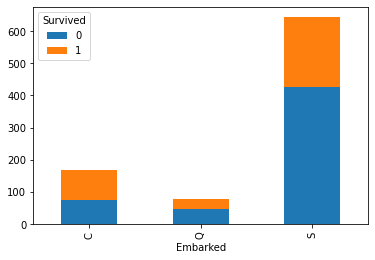

In [12]:
pd.crosstab(X_raw['Embarked'], Y).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Embarked'>

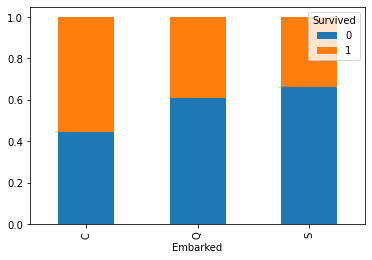

In [15]:
crosstab_1_norm=pd.crosstab(X_raw['Embarked'], Y).div(pd.crosstab(X_raw['Embarked'], Y).sum(1), axis=0)
crosstab_1_norm.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Sex'>

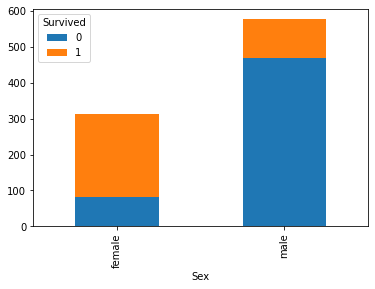

In [16]:
pd.crosstab(X_raw['Sex'], Y).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Sex'>

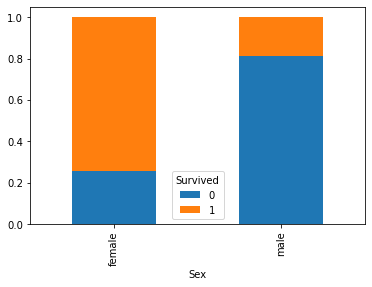

In [17]:
crosstab_2_norm=pd.crosstab(X_raw['Sex'], Y).div(pd.crosstab(X_raw['Sex'], Y).sum(1), axis=0)
crosstab_2_norm.plot(kind='bar', stacked=True)

In [18]:
X_raw['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [22]:
# from categorical data to numbers

from sklearn.feature_extraction import DictVectorizer as DV

encoder = DV(sparse = False)
X_cat = encoder.fit_transform(X_raw[categorical_cols].T.to_dict().values())
X_cat.shape

(891, 6)

In [37]:
X_raw['Age']=X_raw['Age'].fillna(X_raw['Age'].mean())

In [38]:
X_raw['Age'].isnull().values.any()

False

In [33]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [39]:
# mashtabirovanie numeric data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_raw[numeric_cols])
X_scaled = scaler.transform(X_raw[numeric_cols])
X_scaled.shape

(891, 5)

In [40]:
X=np.hstack((X_scaled, X_cat))
X[:5]

array([[ 0.82737724, -0.5924806 ,  0.43279337, -0.47367361, -0.50244517,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ],
       [-1.56610693,  0.63878901,  0.43279337, -0.47367361,  0.78684529,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.82737724, -0.2846632 , -0.4745452 , -0.47367361, -0.48885426,
         0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ],
       [-1.56610693,  0.40792596,  0.43279337, -0.47367361,  0.42073024,
         0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ],
       [ 0.82737724,  0.40792596, -0.4745452 , -0.47367361, -0.48633742,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ]])

In [27]:
from sklearn import model_selection, linear_model, metrics

ridge_classifier = linear_model.RidgeClassifier()

log_regressor = linear_model.LogisticRegression()

log_regressor_2 = linear_model.LogisticRegression(class_weight='balanced')

In [41]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier, X, Y, scoring = 'accuracy', cv = 10)
print(ridge_scoring)

[0.78888889 0.79775281 0.78651685 0.84269663 0.78651685 0.7752809
 0.7752809  0.76404494 0.82022472 0.78651685]


In [43]:
log_scoring = model_selection.cross_val_score(log_regressor, X, Y, scoring = 'accuracy', cv = 10)
print(log_scoring)

[0.78888889 0.79775281 0.7752809  0.80898876 0.78651685 0.7752809
 0.78651685 0.78651685 0.80898876 0.84269663]


In [44]:
log_scoring_2 = model_selection.cross_val_score(log_regressor_2, X, Y, scoring = 'accuracy', cv = 10)
print(log_scoring_2)

[0.78888889 0.76404494 0.7752809  0.78651685 0.79775281 0.79775281
 0.76404494 0.7752809  0.80898876 0.78651685]


In [45]:
from sklearn import tree

tree_scoring=model_selection.cross_val_score(tree.DecisionTreeClassifier(), X, Y, scoring = 'accuracy', cv = 10)
print(tree_scoring)

[0.76666667 0.80898876 0.71910112 0.78651685 0.86516854 0.75280899
 0.80898876 0.73033708 0.84269663 0.82022472]


In [52]:
from sklearn import ensemble

forest_scoring=model_selection.cross_val_score(ensemble.RandomForestClassifier(n_estimators = 50, max_depth=10), X, Y, scoring = 'accuracy', cv = 10)
print(forest_scoring)

[0.75555556 0.84269663 0.74157303 0.84269663 0.93258427 0.84269663
 0.82022472 0.78651685 0.87640449 0.83146067]


In [54]:
forest_scoring.mean()

0.8272409488139825

## test data

In [55]:
data_test = pd.read_csv('test.csv')

In [56]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [57]:
data_test[data_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [58]:
data_test['Age']=data_test['Age'].fillna(data_test['Age'].mean())
data_test['Fare']=data_test['Fare'].fillna(data_test['Fare'].mean())

In [59]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [60]:
X_test=np.hstack((scaler.transform(data_test[numeric_cols]), encoder.transform(data_test[categorical_cols].T.to_dict().values())))
X_test[:5]

array([[ 0.82737724,  0.36944878, -0.4745452 , -0.47367361, -0.49078316,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.82737724,  1.33137817,  0.43279337, -0.47367361, -0.50747884,
         0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ],
       [-0.36936484,  2.48569343, -0.4745452 , -0.47367361, -0.45336687,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.82737724, -0.20770885, -0.4745452 , -0.47367361, -0.47400493,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ],
       [ 0.82737724, -0.5924806 ,  0.43279337,  0.76762988, -0.40101668,
         0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ]])

In [61]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 10)
rfc=rf_classifier.fit(X, Y)

predictions=rfc.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [62]:
result = pd.read_csv('gender_submission.csv')

In [63]:
result.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [64]:
result['Survived']=predictions

In [65]:
result.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [67]:
result.to_csv('My_gender_submission.csv', index=False)

<AxesSubplot:ylabel='Frequency'>

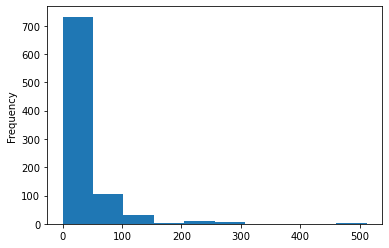

In [68]:
X_raw['Fare'].plot(kind='hist')

In [71]:
print(X_raw['Fare'].mean(), X_raw['Fare'].std())

32.2042079685746 49.693428597180905


(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([-0.64842165,  0.38313716,  1.41469598,  2.4462548 ,  3.47781362,
         4.50937244,  5.54093125,  6.57249007,  7.60404889,  8.63560771,
         9.66716653]),
 <BarContainer object of 10 artists>)

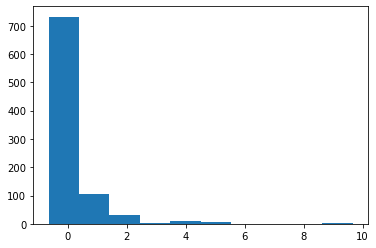

In [88]:
plt.hist(X_scaled[:, 4])

In [94]:
X_raw.query('Fare >82 | Fare <-18')

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
27,1,male,19.000000,3,2,263.0000,C23 C25 C27,S
31,1,female,29.699118,1,0,146.5208,B78,C
34,1,male,28.000000,1,0,82.1708,NaN,C
62,1,male,45.000000,1,0,83.4750,C83,S
88,1,female,23.000000,3,2,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...
820,1,female,52.000000,1,1,93.5000,B69,S
835,1,female,39.000000,1,1,83.1583,E49,C
849,1,female,29.699118,1,0,89.1042,C92,C
856,1,female,45.000000,1,1,164.8667,NaN,S


In [96]:
X_raw.query('Fare <1')

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
179,3,male,36.000000,0,0,0.0,NaN,S
263,1,male,40.000000,0,0,0.0,B94,S
271,3,male,25.000000,0,0,0.0,NaN,S
277,2,male,29.699118,0,0,0.0,NaN,S
302,3,male,19.000000,0,0,0.0,NaN,S
413,2,male,29.699118,0,0,0.0,NaN,S
466,2,male,29.699118,0,0,0.0,NaN,S
481,2,male,29.699118,0,0,0.0,NaN,S
597,3,male,49.000000,0,0,0.0,NaN,S
633,1,male,29.699118,0,0,0.0,NaN,S


## new X there Age and Fare scaled manually

In [98]:
X_manual=X_raw.drop('Cabin', axis=1)

In [99]:
X_manual.shape

(891, 7)

In [101]:
X_manual.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [103]:
from scipy import stats

X_manual['Age']=X_manual['Age'].fillna(X_manual['Age'].mean())
X_manual['Age']=stats.zscore(X_manual['Age'])
X_manual['Fare']=stats.zscore(X_manual['Fare'])

In [106]:
X_manual['Embarked']= X_manual['Embarked'].fillna('NA')
X_manual.replace({'Embarked' : { 'NA' : 0, 'Q' : 1, 'C' : 2, 'S' : 3}}, inplace=True)

In [108]:
X_manual['Sex']=X_manual['Sex'].replace({'female':1, 'male':0})
X_manual.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,-0.592481,1,0,-0.502445,3
1,1,1,0.638789,1,0,0.786845,2
2,3,1,-0.284663,0,0,-0.488854,3
3,1,1,0.407926,1,0,0.420730,3
4,3,0,0.407926,0,0,-0.486337,3


In [109]:
log_scoring_2 = model_selection.cross_val_score(log_regressor_2, X_manual, Y, scoring = 'accuracy', cv = 10)
print(log_scoring_2)

[0.77777778 0.78651685 0.7752809  0.78651685 0.79775281 0.79775281
 0.7752809  0.7752809  0.80898876 0.79775281]


In [114]:
forest_scoring=model_selection.cross_val_score(ensemble.RandomForestClassifier(n_estimators = 50, max_depth=10), X_manual, Y, scoring = 'accuracy', cv = 10)
print(forest_scoring)

[0.76666667 0.83146067 0.74157303 0.87640449 0.8988764  0.85393258
 0.82022472 0.79775281 0.88764045 0.83146067]


In [115]:
forest_scoring.mean()

0.8305992509363296

In [127]:
forest_2=model_selection.cross_val_score(ensemble.RandomForestClassifier(n_estimators = 35, max_depth=5), X_manual, Y, scoring = 'accuracy', cv = 10)
print(forest_2)
forest_2.mean()

[0.76666667 0.82022472 0.76404494 0.91011236 0.8988764  0.82022472
 0.80898876 0.78651685 0.87640449 0.86516854]


0.8317228464419475

In [125]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
cv = 3

estimator=linear_model.LogisticRegression(class_weight='balanced')

optimizer = GridSearchCV(estimator, param_grid, cv = cv,n_jobs=-1)

optimizer.fit(X_manual, Y)
print(optimizer.best_score_)
print(optimizer.best_params_)

auc=metrics.accuracy_score(Y, optimizer.best_estimator_.predict(X_manual))
print('auc=', auc)

0.7867564534231201
{'C': 0.1}
auc= 0.7946127946127947


In [126]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [30, 35, 40, 45, 50, 55, 60], 'max_depth': [None, 5, 10, 15]}
cv = 3

estimator=ensemble.RandomForestClassifier(n_estimators = 50, max_depth=15)

optimizer = GridSearchCV(estimator, param_grid, cv = cv,n_jobs=-1)

optimizer.fit(X_manual, Y)
print(optimizer.best_score_)
print(optimizer.best_params_)

auc=metrics.accuracy_score(Y, optimizer.best_estimator_.predict(X_manual))
print('auc=', auc)

0.8249158249158249
{'max_depth': 5, 'n_estimators': 35}
auc= 0.8518518518518519


In [131]:
# New test_result for New forest

X_test_man=data_test[['Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked']]
X_test_man.replace({'Embarked' : { 'NA' : 0, 'Q' : 1, 'C' : 2, 'S' : 3}}, inplace=True)

/Users/nadiiaturbai/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [132]:
X_test_man['Sex']=X_test_man['Sex'].replace({'female':1, 'male':0})
X_test_man

/var/folders/8z/58g3j_611tj4y8238htpw8p40000gp/T/ipykernel_33109/872720935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_man['Sex']=X_test_man['Sex'].replace({'female':1, 'male':0})


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,1
1,3,1,47.00000,1,0,7.0000,3
2,2,0,62.00000,0,0,9.6875,1
3,3,0,27.00000,0,0,8.6625,3
4,3,1,22.00000,1,1,12.2875,3
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,3
414,1,1,39.00000,0,0,108.9000,2
415,3,0,38.50000,0,0,7.2500,3
416,3,0,30.27259,0,0,8.0500,3


In [136]:
print('Age mean ={} , Age std= {}'. format (X_raw['Age'].mean(), X_raw['Age'].std()))

print('Fare mean ={} , Fare std= {}'. format (X_raw['Fare'].mean(), X_raw['Fare'].std()))

Age mean =29.699117647058763 , Age std= 13.002015226002884
Fare mean =32.2042079685746 , Fare std= 49.693428597180905


In [137]:
X_test_man['Age']=(X_test_man['Age']-X_raw['Age'].mean())/X_raw['Age'].std()
X_test_man.head(5)

/var/folders/8z/58g3j_611tj4y8238htpw8p40000gp/T/ipykernel_33109/2714419341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_man['Age']=(X_test_man['Age']-X_raw['Age'].mean())/X_raw['Age'].std()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,0.369241,0,0,7.8292,1
1,3,1,1.330631,1,0,7.0000,3
2,2,0,2.484298,0,0,9.6875,1
3,3,0,-0.207592,0,0,8.6625,3
4,3,1,-0.592148,1,1,12.2875,3


In [138]:
X_test_man.loc['Fare']=(X_test_man['Fare']-X_raw['Fare'].mean())/X_raw['Fare'].std()
X_test_man.head(5)

/Users/nadiiaturbai/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,0.0,0.369241,0.0,0.0,7.8292,1.0
1,3.0,1.0,1.330631,1.0,0.0,7.0000,3.0
2,2.0,0.0,2.484298,0.0,0.0,9.6875,1.0
3,3.0,0.0,-0.207592,0.0,0.0,8.6625,3.0
4,3.0,1.0,-0.592148,1.0,1.0,12.2875,3.0


In [150]:
#optimizer.best_estimator_.predict(X_test_man)
X_test_man=X_test_man.drop('Fare', axis=0)

In [151]:
result_2 = pd.read_csv('gender_submission.csv')

result_2['Survived']= optimizer.best_estimator_.predict(X_test_man)

result.to_csv('My_2_gender_submission.csv', index=False)

In [154]:
forest_3=model_selection.cross_val_score(ensemble.RandomForestClassifier(n_estimators = 35, max_depth=5), X_manual.drop('Fare', axis=1), Y, scoring = 'accuracy', cv = 10)
print(forest_3)
forest_3.mean()

[0.81111111 0.83146067 0.7752809  0.87640449 0.86516854 0.7752809
 0.80898876 0.76404494 0.88764045 0.83146067]


0.8226841448189763

# Logistic Regression

In [155]:
X_new=data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X_new.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [156]:
X_new['Age']=X_new['Age'].fillna(X_new['Age'].mean())
X_new['Sex']=X_new['Sex'].replace({'female':0, 'male':1})
X_new['Embarked']= X_new['Embarked'].fillna('NA')
X_new.replace({'Embarked' : { 'NA' : 0, 'Q' : 1, 'C' : 2, 'S' : 3}}, inplace=True)
X_new.isnull().values.any()

False

In [157]:
X_test_2=data_test[['Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked']]
X_test_2.replace({'Embarked' : { 'NA' : 0, 'Q' : 1, 'C' : 2, 'S' : 3}}, inplace=True)
X_test_2['Sex']=X_test_2['Sex'].replace({'female':0, 'male':1})
X_test_2.isnull().values.any()

/Users/nadiiaturbai/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/var/folders/8z/58g3j_611tj4y8238htpw8p40000gp/T/ipykernel_33109/1321028314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_2['Sex']=X_test_2['Sex'].replace({'female':0, 'male':1})


False

In [161]:
Y.shape

(891,)

In [159]:
X_new.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,3
1,1,0,38.0,1,0,71.2833,2
2,3,0,26.0,0,0,7.9250,3
3,1,0,35.0,1,0,53.1000,3
4,3,1,35.0,0,0,8.0500,3


In [164]:
log_reg = linear_model.LogisticRegression(max_iter=500)
log_reg.fit(X_new, Y)

LogisticRegression(max_iter=500)

In [165]:
result_3 = pd.read_csv('gender_submission.csv')

result_3['Survived']= log_reg.predict(X_test_2)

result.to_csv('My_3_gender_submission.csv', index=False)